In [28]:
#v1.0
#AUTHOR: Milan Stanko, NTNU, Contact email: milan.stanko@ntnu.no

# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

# Machine Learning Models
from sklearn.neural_network import MLPRegressor

# Train-test split
from sklearn.model_selection import train_test_split

# Metrics

from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

# Additionals

from math import sqrt
import time #for runtime evaluation

In [29]:
#read data
df = pd.read_csv('data.csv')
df.head()

pin [bara]  pout [bara]  GOR [-]    WC [-]  qo [Sm3/d]
0        22.0         20.0    100.0  0.000000  984.598831
1        22.0         20.0    100.0  0.067857  940.512552
2        22.0         20.0    100.0  0.135714  894.316518
3        22.0         20.0    100.0  0.203571  845.854169
4        22.0         20.0    100.0  0.271429  794.953306

In [30]:
#print total number of data points
print("total number of data points: ",df.shape[0])

total number of data points:  50625


In [31]:
#define features and target
X = df.filter(['pin [bara]','pout [bara]','GOR [-]', 'WC [-]'], axis=1)
Y = df.filter(['qo [Sm3/d]'],axis=1)
print('Features shape:', X.shape)
print('Target shape', Y.shape)

Features shape: (50625, 4)
Target shape (50625, 1)


In [32]:
#split of data set into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, shuffle = True)

In [33]:
#Data normalization
sc = preprocessing.StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

y_train = Y_train.values.reshape(len(Y_train),) #Reshaping the output
y_test = Y_test.values.reshape(len(Y_test),)

In [34]:
start_time=time.time()
mlp=MLPRegressor(hidden_layer_sizes=(50,20),activation='relu',solver='adam',max_iter=1000)
mlp.fit(x_train, y_train) 
end_time=time.time()
print('training time:', round(end_time-start_time, 2), 'seconds.')

training time: 76.8 seconds.


In [35]:
#evaluate performance of fitted NN on test data
predictions = mlp.predict(x_test)
# Metrics
print('Model score (R2):',              round(mlp.score(x_test, y_test),2))
print('Mean absolute error:',      round(mean_absolute_error(y_test, predictions),2))
print('Root mean squared error:',  round(sqrt(mean_squared_error(y_test, predictions)),2))

Model score (R2): 1.0
Mean absolute error: 14.47
Root mean squared error: 18.71


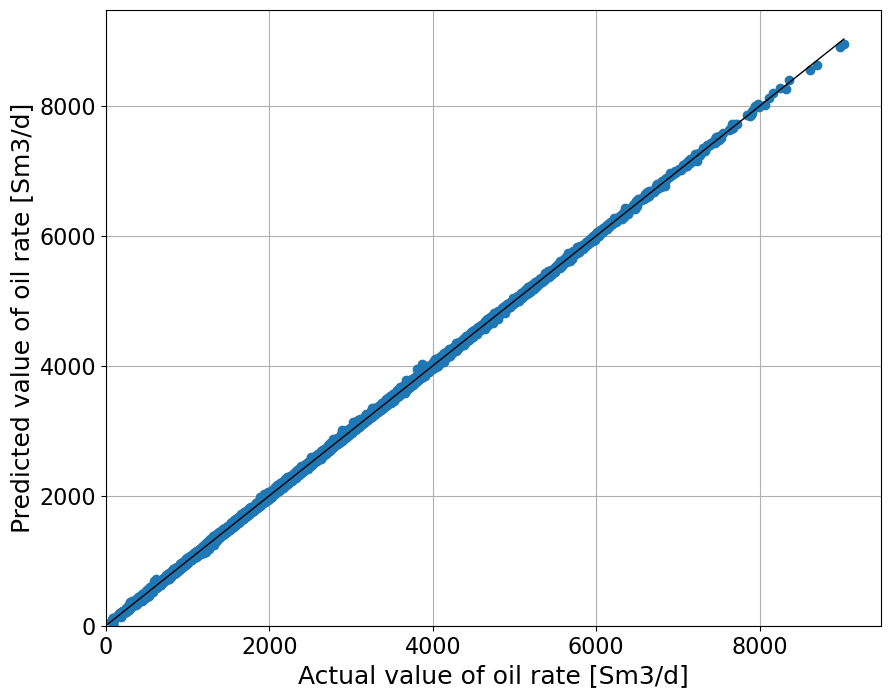

In [36]:
#plot predicted versus actual
plt.figure(figsize=(10,8))
plt.plot(y_test,predictions,'o')
plt.ylabel('Predicted value of oil rate [Sm3/d]',fontsize=18)
plt.xlabel('Actual value of oil rate [Sm3/d]',fontsize=18)
y_max=y_test.max()
straight_line=np.array([0,y_max])
plt.plot(straight_line,straight_line,c='black',linewidth=1.0)
plt.xticks(fontsize=16 )
plt.yticks(fontsize=16 )
plt.xlim(0)
plt.ylim(0)
plt.grid()
plt.show()

In [37]:
#evaluate physical consistency plotting choke performance curve qo vs Dp
#creation of test dataset
npoints=100
GOR_v=np.linspace(200,200,npoints)
WC_v=np.linspace(0,0,npoints)
pin_v=np.linspace(100,100,npoints)
pout_v=np.linspace(98,20,npoints)
Df_test = pd.DataFrame({'pin [bara]':pin_v, 'pout [bara]':pout_v,'GOR [-]':GOR_v,'WC [-]':WC_v})

In [38]:
#scaling
df_test = sc.transform(Df_test)
#evaluation of test dataset
qo_predicted=mlp.predict(df_test)

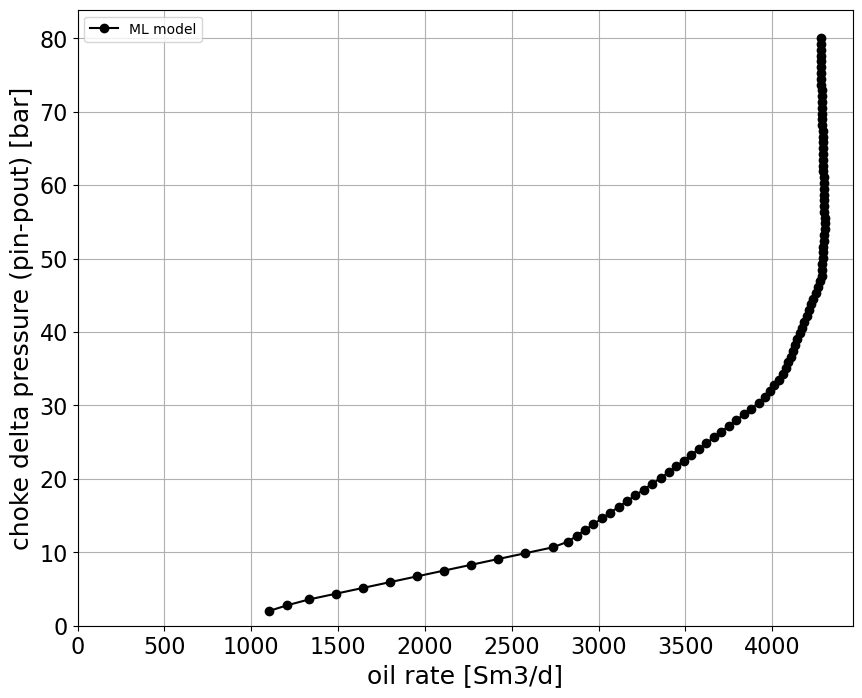

In [39]:
#plot of choke DP versus qo, for the ML model and versus test data
dp_v=np.array(Df_test[['pin [bara]']])-np.array(Df_test[['pout [bara]']])
plt.figure(figsize=(10,8))
plt.plot(qo_predicted,dp_v,marker="o",color="black", label="ML model")
plt.ylabel('choke delta pressure (pin-pout) [bar]',fontsize=18)
plt.xlabel('oil rate [Sm3/d]',fontsize=18)
plt.xticks(fontsize=16 )
plt.yticks(fontsize=16 )
plt.xlim(0)
plt.ylim(0)
plt.legend()
plt.grid()
plt.show()